# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [2]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

321
rank_actual 322


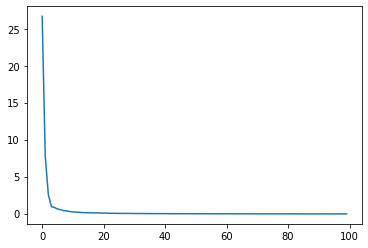

In [10]:
# Samples corresponding to the last digit of your roll number (plot a)
mytrain_data = np.zeros(shape=(6000,784))
eigenvalues = np.array([])
j=0
for i in range(6000):
    
    if train_labels[i] == 1:
        mytrain_data[j,:]=train_data[i,:]
        j=j+1        

eigenvalues = np.linalg.eigvals(np.cov(mytrain_data.T))
mean = np.mean(eigenvalues)
std = np.std(eigenvalues)
eigenvalues = np.sort(eigenvalues)
eigenvalues=np.flip(eigenvalues)
threshold = 1e-5
rank_approx = 0
for i in range(len(eigenvalues)):
    if eigenvalues[i] >= threshold:
        rank_approx = rank_approx+1
print(rank_approx)
print("rank_actual",np.linalg.matrix_rank(np.cov(mytrain_data.T)))
plt.plot((eigenvalues[0:100].real - mean)/std)
plt.show()



520
rank_actual 520


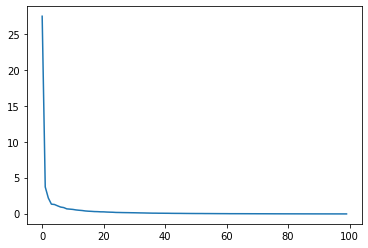

In [11]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
mytrain_data = np.zeros(shape=(6000,784))
eigenvalues = np.array([])
j=0
for i in range(6000):
    
    if train_labels[i] == 2:
        mytrain_data[j,:]=train_data[i,:]
        j=j+1        

eigenvalues = np.linalg.eigvals(np.cov(mytrain_data.T))
mean = np.mean(eigenvalues)
std = np.std(eigenvalues)
eigenvalues = np.sort(eigenvalues)
eigenvalues=np.flip(eigenvalues)
threshold = 1e-5
rank_approx = 0
for i in range(len(eigenvalues)):
    if eigenvalues[i] >= threshold:
        rank_approx = rank_approx+1
print(rank_approx)
print("rank_actual",np.linalg.matrix_rank(np.cov(mytrain_data.T)))
plt.plot((eigenvalues[0:100].real - mean)/std)
plt.show()

658
rank_actual 658


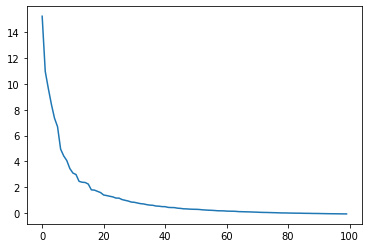

In [13]:
# All training data (plot c)
mytrain_data = np.zeros(shape=(6000,784))
eigenvalues = np.array([])
j=0
# for i in range(6000):
    
#     if train_labels[i] == 2:
#     mytrain_data[i,:]=train_data[i,:]
#     j=j+1        

eigenvalues = np.linalg.eigvals(np.cov(train_data.T))
mean = np.mean(eigenvalues)
std = np.std(eigenvalues)
eigenvalues = np.sort(eigenvalues)
eigenvalues=np.flip(eigenvalues)
threshold = 1e-5
rank_approx = 0
for i in range(len(eigenvalues)):
    if eigenvalues[i] >= threshold:
        rank_approx = rank_approx+1
print(rank_approx)
print("rank_actual",np.linalg.matrix_rank(np.cov(train_data.T)))
plt.plot((eigenvalues[0:100].real - mean)/std)
plt.show()

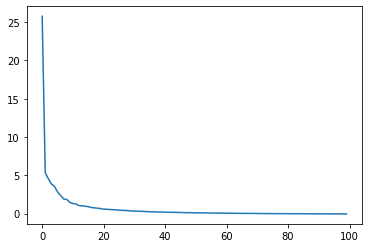

In [172]:
# Randomly selected 50% of the training data (plot d)
arr = np.random.binomial(1, 0.5, 6000)
mytrain_data = np.zeros(shape=(6000,784))
eigenvalues = np.array([])
j=0
for i in range(6000):
    if arr[i] == 1:
        mytrain_data[j,:]=train_data[i,:]      
        j=j+1
eigenvalues = np.linalg.eigvals(np.cov(mytrain_data.T))
mean = np.mean(eigenvalues)
std = np.std(eigenvalues)
eigenvalues = np.sort(eigenvalues)
eigenvalues = np.flip(eigenvalues)
plt.plot((eigenvalues[0:100]-mean)/std)
plt.show()

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
Your answers here (double click to edit)

In this data, all 784 dimensions are not independent. The covariance matrix shows this. So, the whole data lies in a space less than that of 784. The plotted values i.e eigen value spectrum represents the components of the data. Plots a and b are similar eventhough they have its of 1 and 2 respectively because they have similar (data) distribution. But the whole train set has higher data variance i.e eventhough the data distribution is similar, the varies a lot compared to the data of class ID 1 and 2 because each classID may vary differently and when all classID are combined the directions in which they vary cause the whole train set vary more. Hence the eigen value spectrum of covariance matrix of train set has more significant bins than the eigen spectrum of covariance matrix of one particular classID.

<br>

Approximate ranks are printed. Please go above and check. 

---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
Ideally, it is limited by the precision of the computer because each of the 784 dimensions can take a floating point. But if we assume that it can take only binary values i.e 0,1 then the number is 2^784. 
<br>
Percentage available to us as training data is (6000/2^784)* 100. This value comes out to be something close to  5.89704* 10^-231. 
<br>
The eigenvales of the spectrum would be equal because if we had access to all of the data then we would not find covariance between two classIDs. That means the covariance matrix would we diagonal and all the diagonal elements would be equal to each other.So, the spectrum will have equal non-zero values followed by zeroes.   
So, the eigen spectrum will look like a step.

---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Orthonormal matrices have full rank. Hence the columns of the matrix can act as orthonormal basis. If we change the basis, then the eigen values will still remain same. We have also proved this in HW-4 (question 2).

---

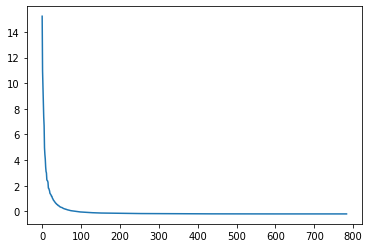

In [173]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.

# code goes here
def rvs(dim=3):
     random_state = np.random
     H = np.eye(dim)
     D = np.ones((dim,))
     for n in range(1, dim):
         x = random_state.normal(size=(dim-n+1,))
         D[n-1] = np.sign(x[0])
         x[0] -= D[n-1]*np.sqrt((x*x).sum())
         # Householder transformation
         Hx = (np.eye(dim-n+1) - 2.*np.outer(x, x)/(x*x).sum())
         mat = np.eye(dim)
         mat[n-1:, n-1:] = Hx
         H = np.dot(H, mat)
         # Fix the last sign such that the determinant is 1
     D[-1] = (-1)**(1-(dim % 2))*D.prod()
     # Equivalent to np.dot(np.diag(D), H) but faster, apparently
     H = (D*H.T).T
     return H
x=rvs(784)
res=np.matmul(train_data, x)
# print(res)
mytrain_data = np.zeros(shape=(6000,784))
eigenvalues = np.array([])
j=0
for i in range(6000):
    
        mytrain_data[i,:]=res[i,:]      

eigenvalues = np.linalg.eigvals(np.cov(res.T))
mean = np.mean(eigenvalues)
std = np.std(eigenvalues)
eigenvalues = np.sort(eigenvalues)
eigenvalues=np.flip(eigenvalues)
plt.plot((eigenvalues-mean)/std)
# plt.hist((eigenvalues-mean)/std, bins=100)
plt.show()

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
There will be only 1 or 2 non-zero eigen values using the formula rank(AB) <= min(rank(A),rank(B)). So rank of AB is less than or equal to 2. We know that the no. of non-zero eigen values is equal to or less than the rank of the matrix. So, the eigen spectrum will have 2 non-zero values. 

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

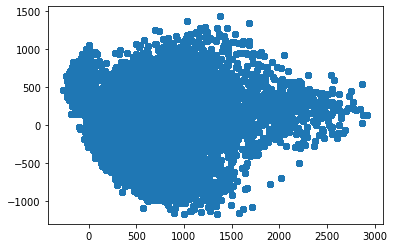

In [58]:
# Plotting code here
mytrain_data = np.zeros(shape=(6000,784))
eigenvalues = np.array([])
xcoord = np.zeros(shape=(6000,784))
ycoord = np.zeros(shape=(6000,784))
eigenvalues, eigenvectors = np.linalg.eig(np.cov(train_data.T))
eigenvec1 = eigenvectors[:,0]
eigenvec2 = eigenvectors[:,1]
for i in range(6000):
    
        xcoord[i:,] = np.real(np.dot(train_data[i,:], eigenvec1))
        ycoord[i:,] = np.real(np.dot(train_data[i,:], eigenvec2))
# print(xcoord)
plt.scatter(xcoord, ycoord)
plt.show()

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [133]:
# Print accuracy on the test set using MLE
mytrain_data0 = np.zeros(shape=(600,784))
mytrain_data1 = np.zeros(shape=(600,784))
mytrain_data2 = np.zeros(shape=(600,784))
mytrain_data3 = np.zeros(shape=(600,784))
mytrain_data4 = np.zeros(shape=(600,784))
mytrain_data5 = np.zeros(shape=(600,784))
mytrain_data6 = np.zeros(shape=(600,784))
mytrain_data7 = np.zeros(shape=(600,784))
mytrain_data8 = np.zeros(shape=(600,784))
mytrain_data9 = np.zeros(shape=(600,784))
p = np.zeros(shape=(10,))
eigenvalues = np.array([])
j=0
for i in range(6000):
    if int(train_labels[i]) == 0:
        mytrain_data0[j,:]=train_data[i,:]      
        j=j+1
j=0
for i in range(6000):
    if int(train_labels[i]) == 1:
        mytrain_data1[j,:]=train_data[i,:]      
        j=j+1

j=0
for i in range(6000):
    if int(train_labels[i]) == 2:
        mytrain_data2[j,:]=train_data[i,:]      
        j=j+1

j=0
for i in range(6000):
    if int(train_labels[i]) == 3:
        mytrain_data3[j,:]=train_data[i,:]      
        j=j+1
        
j=0
for i in range(6000):
    if int(train_labels[i]) == 4:
        mytrain_data4[j,:]=train_data[i,:]      
        j=j+1

j=0
for i in range(6000):
    if int(train_labels[i]) == 5:
        mytrain_data5[j,:]=train_data[i,:]      
        j=j+1

j=0
for i in range(6000):
    if int(train_labels[i]) == 6:
        mytrain_data6[j,:]=train_data[i,:]      
        j=j+1

j=0
for i in range(6000):
    if int(train_labels[i]) == 7:
        mytrain_data7[j,:]=train_data[i,:]      
        j=j+1

j=0       
for i in range(6000):
    if int(train_labels[i]) == 8:
        mytrain_data8[j,:]=train_data[i,:]      
        j=j+1
        
j=0    
for i in range(6000):
    if int(train_labels[i]) == 9:
        mytrain_data9[j,:]=train_data[i,:]      
        j=j+1
        
cov0 = np.cov(mytrain_data0.T)
gram0 = np.cov(mytrain_data0)
mean0 = np.mean(mytrain_data0, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram0)
logdet0 = logdet
psedoinversecov0 = np.linalg.pinv(cov0)

cov1 = np.cov(mytrain_data1.T)
gram1 = np.cov(mytrain_data1)
mean1 = np.mean(mytrain_data1, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram1)
logdet1 = logdet
psedoinversecov1 = np.linalg.pinv(cov1)

cov2 = np.cov(mytrain_data2.T)
gram2 = np.cov(mytrain_data2)
mean2 = np.mean(mytrain_data2, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram2)
logdet2 = logdet
psedoinversecov2 = np.linalg.pinv(cov2)

cov3 = np.cov(mytrain_data3.T)
gram3 = np.cov(mytrain_data3)
mean3 = np.mean(mytrain_data3, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram3)
logdet3 = logdet
psedoinversecov3 = np.linalg.pinv(cov3)

cov4 = np.cov(mytrain_data4.T)
gram4 = np.cov(mytrain_data4)
mean4 = np.mean(mytrain_data4, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram4)
logdet4 = logdet
psedoinversecov4 = np.linalg.pinv(cov4)

cov5 = np.cov(mytrain_data5.T)
gram5 = np.cov(mytrain_data5)
mean5 = np.mean(mytrain_data5, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram5)
logdet5 = logdet
psedoinversecov5 = np.linalg.pinv(cov5)

cov6 = np.cov(mytrain_data6.T)
gram6 = np.cov(mytrain_data6)
mean6 = np.mean(mytrain_data6, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram6)
logdet6 = logdet
psedoinversecov6 = np.linalg.pinv(cov6)

cov7 = np.cov(mytrain_data7.T)
gram7 = np.cov(mytrain_data7)
mean7 = np.mean(mytrain_data7, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram7)
logdet7 = logdet
psedoinversecov7 = np.linalg.pinv(cov7)

cov8 = np.cov(mytrain_data8.T)
gram8 = np.cov(mytrain_data8)
mean8 = np.mean(mytrain_data8, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram8)
logdet8 = logdet
psedoinversecov8 = np.linalg.pinv(cov8)

cov9 = np.cov(mytrain_data9.T)
gram9 = np.cov(mytrain_data9)
mean9 = np.mean(mytrain_data9, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram9)
logdet9 = logdet
psedoinversecov9 = np.linalg.pinv(cov9)

cnt=0
for i in range(1000): #every test data 
    p[0] = (logdet0 + np.dot(((test_data[i,:] - mean0).T), np.dot(psedoinversecov0,(test_data[i,:] - mean0))))
    p[1] = (logdet1 + np.dot(((test_data[i,:] - mean1).T), np.dot(psedoinversecov1,(test_data[i,:] - mean1))))
    p[2] = (logdet2 + np.dot(((test_data[i,:] - mean2).T), np.dot(psedoinversecov2,(test_data[i,:] - mean2))))
    p[3] = (logdet3 + np.dot(((test_data[i,:] - mean3).T), np.dot(psedoinversecov3,(test_data[i,:] - mean3))))
    p[4] = (logdet4 + np.dot(((test_data[i,:] - mean4).T), np.dot(psedoinversecov4,(test_data[i,:] - mean4))))
    p[5] = (logdet5 + np.dot(((test_data[i,:] - mean5).T), np.dot(psedoinversecov5,(test_data[i,:] - mean5))))
    p[6] = (logdet6 + np.dot(((test_data[i,:] - mean6).T), np.dot(psedoinversecov6,(test_data[i,:] - mean6))))
    p[7] = (logdet7 + np.dot(((test_data[i,:] - mean7).T), np.dot(psedoinversecov7,(test_data[i,:] - mean7))))
    p[8] = (logdet8 + np.dot(((test_data[i,:] - mean8).T), np.dot(psedoinversecov8,(test_data[i,:] - mean8))))
    p[9] = (logdet9 + np.dot(((test_data[i,:] - mean9).T), np.dot(psedoinversecov9,(test_data[i,:] - mean9))))
    finans=np.argmin(p)
    if int(test_labels[i]) == finans:
        cnt+=1
print(cnt/1000)

0.72


In [175]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)
# In this case MLE = MAP since the other probabilities are just constants and they wont affect since we take max of the probabilities 
mytrain_data0 = np.zeros(shape=(600,784))
mytrain_data1 = np.zeros(shape=(600,784))
mytrain_data2 = np.zeros(shape=(600,784))
mytrain_data3 = np.zeros(shape=(600,784))
mytrain_data4 = np.zeros(shape=(600,784))
mytrain_data5 = np.zeros(shape=(600,784))
mytrain_data6 = np.zeros(shape=(600,784))
mytrain_data7 = np.zeros(shape=(600,784))
mytrain_data8 = np.zeros(shape=(600,784))
mytrain_data9 = np.zeros(shape=(600,784))
p = np.zeros(shape=(10,))
eigenvalues = np.array([])
j=0
for i in range(6000):
    if int(train_labels[i]) == 0:
        mytrain_data0[j,:]=train_data[i,:]      
        j=j+1
j=0
for i in range(6000):
    if int(train_labels[i]) == 1:
        mytrain_data1[j,:]=train_data[i,:]      
        j=j+1

j=0
for i in range(6000):
    if int(train_labels[i]) == 2:
        mytrain_data2[j,:]=train_data[i,:]      
        j=j+1

j=0
for i in range(6000):
    if int(train_labels[i]) == 3:
        mytrain_data3[j,:]=train_data[i,:]      
        j=j+1
        
j=0
for i in range(6000):
    if int(train_labels[i]) == 4:
        mytrain_data4[j,:]=train_data[i,:]      
        j=j+1

j=0
for i in range(6000):
    if int(train_labels[i]) == 5:
        mytrain_data5[j,:]=train_data[i,:]      
        j=j+1

j=0
for i in range(6000):
    if int(train_labels[i]) == 6:
        mytrain_data6[j,:]=train_data[i,:]      
        j=j+1

j=0
for i in range(6000):
    if int(train_labels[i]) == 7:
        mytrain_data7[j,:]=train_data[i,:]      
        j=j+1

j=0       
for i in range(6000):
    if int(train_labels[i]) == 8:
        mytrain_data8[j,:]=train_data[i,:]      
        j=j+1
        
j=0    
for i in range(6000):
    if int(train_labels[i]) == 9:
        mytrain_data9[j,:]=train_data[i,:]      
        j=j+1
        
cov0 = np.cov(mytrain_data0.T)
gram0 = np.cov(mytrain_data0)
mean0 = np.mean(mytrain_data0, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram0)
logdet0 = logdet
psedoinversecov0 = np.linalg.pinv(cov0)

cov1 = np.cov(mytrain_data1.T)
gram1 = np.cov(mytrain_data1)
mean1 = np.mean(mytrain_data1, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram1)
logdet1 = logdet
psedoinversecov1 = np.linalg.pinv(cov1)

cov2 = np.cov(mytrain_data2.T)
gram2 = np.cov(mytrain_data2)
mean2 = np.mean(mytrain_data2, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram2)
logdet2 = logdet
psedoinversecov2 = np.linalg.pinv(cov2)

cov3 = np.cov(mytrain_data3.T)
gram3 = np.cov(mytrain_data3)
mean3 = np.mean(mytrain_data3, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram3)
logdet3 = logdet
psedoinversecov3 = np.linalg.pinv(cov3)

cov4 = np.cov(mytrain_data4.T)
gram4 = np.cov(mytrain_data4)
mean4 = np.mean(mytrain_data4, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram4)
logdet4 = logdet
psedoinversecov4 = np.linalg.pinv(cov4)

cov5 = np.cov(mytrain_data5.T)
gram5 = np.cov(mytrain_data5)
mean5 = np.mean(mytrain_data5, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram5)
logdet5 = logdet
psedoinversecov5 = np.linalg.pinv(cov5)

cov6 = np.cov(mytrain_data6.T)
gram6 = np.cov(mytrain_data6)
mean6 = np.mean(mytrain_data6, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram6)
logdet6 = logdet
psedoinversecov6 = np.linalg.pinv(cov6)

cov7 = np.cov(mytrain_data7.T)
gram7 = np.cov(mytrain_data7)
mean7 = np.mean(mytrain_data7, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram7)
logdet7 = logdet
psedoinversecov7 = np.linalg.pinv(cov7)

cov8 = np.cov(mytrain_data8.T)
gram8 = np.cov(mytrain_data8)
mean8 = np.mean(mytrain_data8, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram8)
logdet8 = logdet
psedoinversecov8 = np.linalg.pinv(cov8)

cov9 = np.cov(mytrain_data9.T)
gram9 = np.cov(mytrain_data9)
mean9 = np.mean(mytrain_data9, axis = 0)
(sign, logdet) = np.linalg.slogdet(gram9)
logdet9 = logdet
psedoinversecov9 = np.linalg.pinv(cov9)

cnt=0
for i in range(1000): #every test data 
    p[0] = (logdet0 + np.dot(((test_data[i,:] - mean0).T), np.dot(psedoinversecov0,(test_data[i,:] - mean0))))
    p[1] = (logdet1 + np.dot(((test_data[i,:] - mean1).T), np.dot(psedoinversecov1,(test_data[i,:] - mean1))))
    p[2] = (logdet2 + np.dot(((test_data[i,:] - mean2).T), np.dot(psedoinversecov2,(test_data[i,:] - mean2))))
    p[3] = (logdet3 + np.dot(((test_data[i,:] - mean3).T), np.dot(psedoinversecov3,(test_data[i,:] - mean3))))
    p[4] = (logdet4 + np.dot(((test_data[i,:] - mean4).T), np.dot(psedoinversecov4,(test_data[i,:] - mean4))))
    p[5] = (logdet5 + np.dot(((test_data[i,:] - mean5).T), np.dot(psedoinversecov5,(test_data[i,:] - mean5))))
    p[6] = (logdet6 + np.dot(((test_data[i,:] - mean6).T), np.dot(psedoinversecov6,(test_data[i,:] - mean6))))
    p[7] = (logdet7 + np.dot(((test_data[i,:] - mean7).T), np.dot(psedoinversecov7,(test_data[i,:] - mean7))))
    p[8] = (logdet8 + np.dot(((test_data[i,:] - mean8).T), np.dot(psedoinversecov8,(test_data[i,:] - mean8))))
    p[9] = (logdet9 + np.dot(((test_data[i,:] - mean9).T), np.dot(psedoinversecov9,(test_data[i,:] - mean9))))
    finans=np.argmin(p)
    if int(test_labels[i]) == finans:
        cnt+=1
print(cnt/1000)

0.72


In [151]:
# Print accuracy using Bayesian pairwise majority voting method
cnt=0
for i in range(1000): #for every training data point 
    freq = np.zeros(10)
    for j in range(10):
        for z in range(j+1, 10):
            diff1 = test_data[i,:] - np.mean(train_data[np.where(train_labels == j)], axis=0)
            diff2 = test_data[i,:] - np.mean(train_data[np.where(train_labels == z)], axis=0)
            
            diff1 = np.linalg.norm(diff1)
            diff2 = np.linalg.norm(diff2)

            if diff1 > diff2:
                   freq[z] += 1
            else:
                freq[j] += 1
    if test_labels[i] == np.argmax(freq):
        cnt+= 1
        
print(cnt/1000)


0.77


In [5]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
cnt = 0
highind = 0
lowind = 0
for i in range(1000):
    freq = np.zeros(10)
    meanline = np.zeros(shape=(784))
    for j in range(10):
        for z in range(j+1,10):
            meanline = np.mean(train_data[np.where(train_labels == j)], axis=0) - np.mean(train_data[np.where(train_labels == z)], axis=0) #line connecting the means of two classes 
            midmean = (np.mean(train_data[np.where(train_labels == j)], axis=0) + np.mean(train_data[np.where(train_labels == z)], axis=0))/2 #midpoint of the mean 
            if np.dot((np.mean(train_data[np.where(train_labels == j)], axis=0) - midmean), meanline) > np.dot((np.mean(train_data[np.where(train_labels == z)], axis=0) - midmean), meanline): #get the dot product of the line joining the mean of each class to the line joining  
                if np.dot((test_data[i,:] - midmean), meanline) > 0:
                              freq[j] += 1
                else:
                              freq[z] += 1
            else: 
                if np.dot((test_data[i,:] - midmean), meanline) > 0:
                              freq[z] += 1
                else:
                              freq[j] += 1
            
    if test_labels[i] == np.argmax(freq):
        cnt+= 1
                              
print(cnt/1000)
        
        

0.77


### 1.3.3 Question 4
Compare performances and salient observations

---
Your analysis here (double click to edit)
MAP and MLE give approximately the same accuracy. This is because all digits occur with equal probability in the given the data set.
<br>
Bayesian pairwaise voting and perpendicular bisector method both give the same accuracy. These are two different ways to calculate the same things because it is given that covariance matrix of all classIDs is same.
<br>
With the observation, the performace of Bayesian pairwaise voting and perpendicular bisector method is better than MAP and MLE methods. But there are several ways with which MAP and MLE performances improve significantly. 

---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [177]:
# Your code here
dist = np.zeros(6000,) 
cnt = 0
for i in range(1000): # for every test data 
    z=0
    sort = np.zeros(6000,)
    for j in range(6000): #for every training data 
        dist[z] = np.linalg.norm(train_data[j,:]-test_data[i,:]) # euclidean distance 
        z = z+1
    sort = np.argsort(dist)
#     test_label[i] # ground truth 
#     train_label[sort[0]] #check for k = 1
    if test_labels[i] == train_labels[sort[0]]:
        cnt += 1 # k = 1
print(cnt/1000)

dist = np.zeros(6000,) 
cnt = 0
for i in range(1000): # for every test data 
    z=0
    freq = np.zeros(10,)
    sort = np.zeros(6000,)
    for j in range(6000): #for every training data 
        dist[z] = np.linalg.norm(train_data[j,:]-test_data[i,:]) # euclidean distance 
        z = z+1
    sort = np.argsort(dist)
    maxi = 0
    for k in range(3):# k = 3
        freq[int(train_labels[sort[k]])] += 1
    for k in range(10):
        if maxi < freq[k]:
            maxi = k
    pred = np.argmax(freq)
    if test_labels[i] == pred:
        cnt += 1 
print(cnt/1000)

dist = np.zeros(6000,) 
cnt = 0
for i in range(1000): # for every test data 
    z=0
    freq = np.zeros(10,)
    sort = np.zeros(6000,)
    for j in range(6000): #for every training data 
        dist[z] = np.linalg.norm(train_data[j,:]-test_data[i,:]) # euclidean distance 
        z = z+1
    sort = np.argsort(dist)
    maxi = 0
    for k in range(7):# k = 7
        freq[int(train_labels[sort[k]])] += 1
    pred = np.argmax(freq)
    if test_labels[i] == pred:
        cnt += 1 
print(cnt/1000)
# Print accuracies with K = 1, 3, 7


0.907
0.916
0.916


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
The accuracies for k=1, 3, 7 are roughly the same. Suppose two classes have a tie, then the algorithm doesn't have any confidence regarding which class to decide. Hence a different K would help us predict with more confidence. So choose a K that has less ties to break.  

To identify the best k, iterate through all possible values of k and find the best k out of that i.e a linear search would work best for this problem. 

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [4]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [6]:
dist = np.zeros(6020,) 
cnt = 0
remove = []
for i in range(6000): # for every train data point 
    z=0
    freq = np.zeros(10,)
    sort = np.zeros(6000,)
    for j in range(6000): #for every other training data point 
        if i != j:
            dist[z] = np.linalg.norm(train_data[j,:]-train_data[i,:]) # euclidean distance 
            z = z+1
    for j in range(20): #and every mixed data point 
        z = z+1
        dist[z] = np.linalg.norm(mixed_data[j,:]-train_data[i,:])# euclidean distance 
    sort = np.argsort(dist)
    for k in range(7): 
        if sort[k] > 5999: #that means there is a mixed data point 
            remove.append(sort[k] - 6000)
for i in range(20):
    if i not in remove:
        print (i) #like asked I am printing the indices of outliers 
        #print (mixed_data[i,:])
    # we know the indices which are not outliers 
    

0
4
6
7
9
18


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Algorithm: 
1. Choose a K to run KNN over the data (I chose k =7)
<br>
2. Then take the mean of the neatness scores of the K nearest neighbors (7 in this case)
<br>
---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [82]:
# Your code here
# knn for k = 7
dist = np.zeros(6000,) 
cnt = 0
finsum=0
for i in range(1000): # for every test data 
    z=0
    freq = np.zeros(10,)
    sort = np.zeros(6000,)
    for j in range(6000): #for every training data 
        dist[z] = np.linalg.norm(train_data[j,:]-test_data[i,:]) # euclidean distance 
        z = z+1
    sort = np.argsort(dist)
    maxi = 0
    sumof = 0
    for k in range(7):
        sumof += train_labels[sort[k]]
    sumof = sumof/10 # to make 0-10 to 0-1
    mean = sumof/7
    finsum = finsum + abs(test_labels[i]/10 - mean)
    
print(finsum/1000)
        


0.043771428571428676


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---